<a href="https://colab.research.google.com/github/raphaelreinauer/Deep_Q_learning/blob/master/Q_learning_frozen_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy
!pip install gym

In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

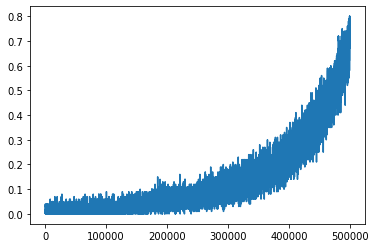

In [0]:
#random.seed(42)
env = gym.make("FrozenLake-v0")
action_space = env.action_space
state_space = env.observation_space
alpha = 0.001
gamma = 0.9
epsilon_max = 1.
epsilon_on_max = 1.
epsilon_min = .01
n_episodes = 500000

…plt.show()min = .01
n_episodes = 500000

agent = Agent(action_space, state_space, alpha, gamma)
reward_list = np.zeros(n_episodes)

for i_episode in range(n_episodes):
    s = env.reset()
    done = False
    while not done:
        epsilon = (epsilon_max-epsilon_min)*(1-i_episode/n_episodes)+epsilon_min
        if random.uniform(0, 1) < epsilon:
            action = action_space.sample()
        else:
            action = agent.get_max_a(s)
        s_old = s
        s, reward, done, info = env.step(action)
        agent.update_Q(s_old,action,s,reward)
        if done:
            reward_list[i_episode]=reward
            break
env.close()
plt.plot(np.convolve(reward_list, np.ones((100,))/100, mode='valid'))
plt.show()

In [0]:
class Agent:
    def __init__(self, action_space, state_space, alpha, gamma):
        self.action_space = action_space
        self.state_space = state_space
        self.alpha = alpha
        self.gamma = gamma

        self.Q_table = np.zeros((self.state_space.n,self.action_space.n))
        
    def update_Q(self, s, a, s_prime, r):
        self.Q_table[s,a] += self.alpha * (r + self.gamma*max(self.Q_table[s_prime,:])-\
                                           self.Q_table[s,a])
    def get_max_a(self,s):
        return np.argmax(self.Q_table[s,:])

In [0]:
#print Q_table
agent.Q_table

array([[0.06974293, 0.06608656, 0.0663036 , 0.05980952],
       [0.03872865, 0.04190288, 0.04085537, 0.06206612],
       [0.07640966, 0.06799107, 0.07116956, 0.05696975],
       [0.03701892, 0.03708861, 0.03206014, 0.05522492],
       [0.09407888, 0.07155978, 0.06486291, 0.04778226],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10602773, 0.08431959, 0.11659006, 0.02318609],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06938331, 0.11931497, 0.09965187, 0.14639363],
       [0.15554853, 0.2472777 , 0.20971777, 0.13386539],
       [0.30735919, 0.25464901, 0.21922273, 0.10401585],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18943996, 0.29891239, 0.37735494, 0.25611839],
       [0.39925072, 0.63059728, 0.60438006, 0.54780978],
       [0.        , 0.        , 0.        , 0.        ]])

In [0]:
env = gym.make("FrozenLake-v0")
for i_episode in range(10):
    s = env.reset()
    done = False
    print("\n\nNew Game")
    while not done:
        env.render()
        epsilon = epsilon_min
        if random.uniform(0, 1) < epsilon:
            action = action_space.sample()
        else:
            action = agent.get_max_a(s)
        s_old = s
        s, reward, done, info = env.step(action)
        agent.update_Q(s_old,action,s,reward)
        if done:
            reward_list[i_episode]=reward
            break
env.close()



New Game

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HF